Case

At a cooking website, there's a proposal to change the product page's horizontal media rail to a vertical one. 
An A/B test was conducted where users were divided into two groups: Control group A and Treatment group B.


Primary metric - Conversion Rate ('Add to cart')
Secondary metric - Conversion Rate (GMV (in $))

Null Hypothesis (H0): There is no significant difference in the conversion rate between the product page with the horizontal media rail and the product page with the vertical media rail.

Alternative Hypothesis (H1): There is a significant difference in the conversion rate between the product page with the horizontal media rail and the product page with the vertical media rail.

Significance Level alpha = 0.05

STEP 1. Loading and checking the data

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import binom

In [6]:
#load data as a DataFrame
df = pd.read_csv('assessment_da25.csv')
df

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
0,A,5,0.00,0,2,74,0
1,A,4,0.00,4,1,21,1
2,A,4,0.00,2,0,1,2
3,A,5,0.00,0,1,26,3
4,A,5,0.00,3,3,46,4
...,...,...,...,...,...,...,...
1995,B,3,0.00,1,0,1,1995
1996,B,3,0.00,1,2,31,1996
1997,B,3,0.00,2,0,3,1997
1998,B,4,87.08,2,1,11,1998


In [25]:
# Check number of unique users
unique_users = df['user_id'].nunique()

print ("Total number of users: ", unique_users)

# Counting the number of users in each group.
n_users_A = df[df['Variant'] == 'A']['user_id'].value_counts().sum()
n_users_B = df[df['Variant'] == 'B']['user_id'].value_counts().sum()

print ("Number of users in Control group A: ", n_users_A) 
print ("Number of users in Treatment group B: ", n_users_B)

Total number of users:  2000
Number of users in Control group A:  1000
Number of users in Treatment group B:  1000


In [8]:
# Check for missing values in data
missing_values = df.isnull().sum()

print("Missing values in df:")
print(missing_values)

Missing values in df:
Variant                  0
Number of page views     0
GMV (in $)               0
Number of add to cart    0
Clicks on media          0
Time on Page (sec)       0
user_id                  0
dtype: int64


In summary, the dataset comprises 2000 unique users evenly distributed between the control (Group A) and treatment (Group B) groups, with 1000 users in each. 
No missing values were detected during data check.
So, data is complete and reliable for further analysis.

STEP 2. 

For the primary metric  was chosen  Conversion Rate of adding items to the cart because it directly reflects whether changes in visualizing media on the product page affect user engagement.
Significance Level alpha = 0.05

In [13]:
df.groupby('Variant')[['GMV (in $)','Time on Page (sec)','Number of add to cart','Clicks on media']].agg(['sum','mean','std'])

GMV (in $)                     Time on Page (sec)                     \
               sum     mean        std                sum    mean        std   
Variant                                                                        
A          7689.99  7.68999  26.794816              20543  20.543  20.596076   
B          9289.53  9.28953  28.879687              20047  20.047  19.319784   

        Number of add to cart                  Clicks on media         \
                          sum   mean       std             sum   mean   
Variant                                                                 
A                        1884  1.884  1.297778            1495  1.495   
B                        2469  2.469  1.660662            1324  1.324   

                   
              std  
Variant            
A        1.230239  
B        1.180855

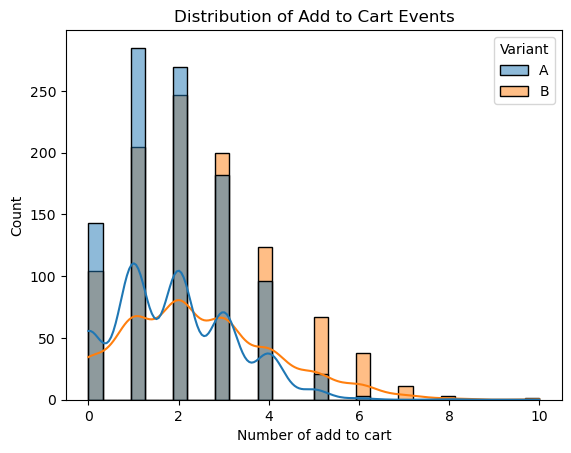

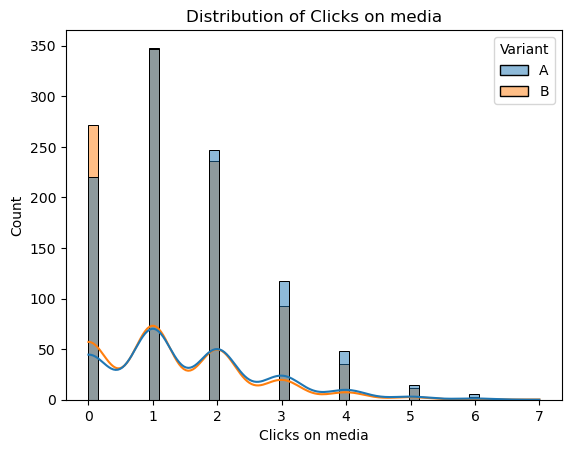

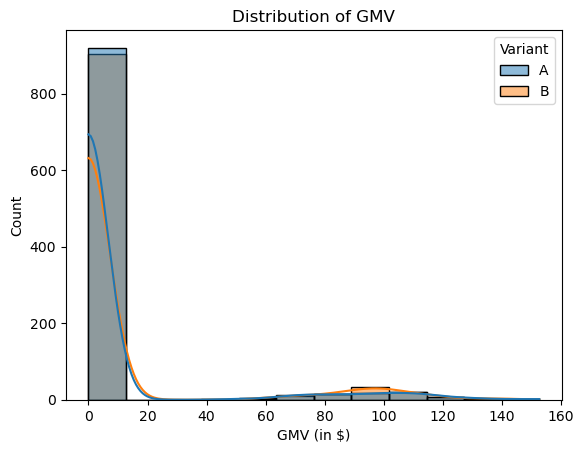

In [21]:
#Visualizing the metrics distribution for each group
sns.histplot(x='Number of add to cart', hue='Variant', data=df, kde=True)
plt.title('Distribution of Add to Cart Events')
plt.show()

sns.histplot(x='Clicks on media', hue='Variant', data=df, kde=True)
plt.title('Distribution of Clicks on media')
plt.show()

sns.histplot(x='GMV (in $)', hue='Variant', data=df, kde=True)
plt.title('Distribution of GMV')
plt.show()

In [10]:
# Convert 'Number of add to cart' into binary values. Did user add at least something to the cart?
# Add new column to df
df['Added to Cart'] = df['Number of add to cart'].apply(lambda x: 1 if x > 0 else 0)

print (df.head (5))

  Variant  Number of page views  GMV (in $)  Number of add to cart  \
0       A                     5         0.0                      0   
1       A                     4         0.0                      4   
2       A                     4         0.0                      2   
3       A                     5         0.0                      0   
4       A                     5         0.0                      3   

   Clicks on media  Time on Page (sec)  user_id  Added to Cart  
0                2                  74        0              0  
1                1                  21        1              1  
2                0                   1        2              1  
3                1                  26        3              0  
4                3                  46        4              1  


Primary metric Conversion rate for 'Added to Cart'

In [52]:
# Calculate Conversion rate for 'Added to Cart'
conv_rate_A = df[df['Variant'] == 'A']['Added to Cart'].mean() 
conv_rate_B = df[df['Variant'] == 'B']['Added to Cart'].mean() 

print("Conversion Rate for Group A:", round(conv_rate_A,2))
print("Conversion Rate for Group B:", round(conv_rate_B,2))

Conversion Rate for Group A: 0.86
Conversion Rate for Group B: 0.9


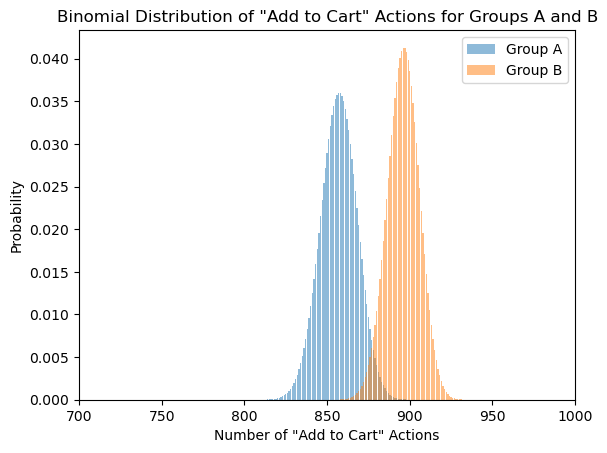

In [67]:
#plot the binomial distribution of the two variants
# Set parameters for the binomial distribution
n_A = len(df[df['Variant']=='A'])# number of trials = sample size
n_B = len(df[df['Variant']=='B'])
p_A = conv_rate_A # probability of success 
p_B = conv_rate_B 

# Generate x-values
x_values_A = np.arange(0, n_A + 1)  # possible number of successes for group 
x_values_B = np.arange(0, n_B + 1)  

# Calculate PMF for each group
pmf_A = binom.pmf(x_values_A, n_A, p_A)
pmf_B = binom.pmf(x_values_B, n_B, p_B)

# Plot the PMF for Group A
plt.bar(x_values_A, pmf_A, label='Group A', alpha=0.5)

# Plot the PMF for Group B
plt.bar(x_values_B, pmf_B, label='Group B', alpha=0.5)

plt.xlabel('Number of "Add to Cart" Actions')
plt.ylabel('Probability')
plt.title('Binomial Distribution of "Add to Cart" Actions for Groups A and B')
plt.xlim(700,1000)
plt.legend()
plt.show()


In [14]:
#Perform t-test to calculate test statistic and a p-value 
t_statistic, p_value = stats.ttest_ind(df[df['Variant'] == 'A']['Added to Cart'],
                                       df[df['Variant'] == 'B']['Added to Cart'])

print("t-statistic:", round(t_statistic,2))
print("p-value:", round(p_value,2))

t-statistic: -2.65
p-value: 0.01


p-value is less than the significance level of 0.05, so we can reject the null hypothesis in favor of the alternative hypothesis, concluding that there is a statistically significant difference in the "Added to Cart" metric between Group A and Group B.

Secondary metric Conversion rate for GMV (in $)

In [59]:
# Convert 'GMV (in $)' into binary values. Did user made a purchase? 
# Add new column to df
df['Purchase'] = df['GMV (in $)'].apply(lambda x: 1 if x > 0 else 0)

In [60]:
# Calculate Conversion rate for 'Added to Cart'
gmv_mean_A = df[df['Variant'] == 'A']['Purchase'].mean()
gmv_mean_B = df[df['Variant'] == 'B']['Purchase'].mean()

print("Conversion Rate for Group A:", round(gmv_mean_A,2))
print("Conversion Rate for Group B:", round(gmv_mean_B,2))

Conversion Rate for Group A: 0.08
Conversion Rate for Group B: 0.1


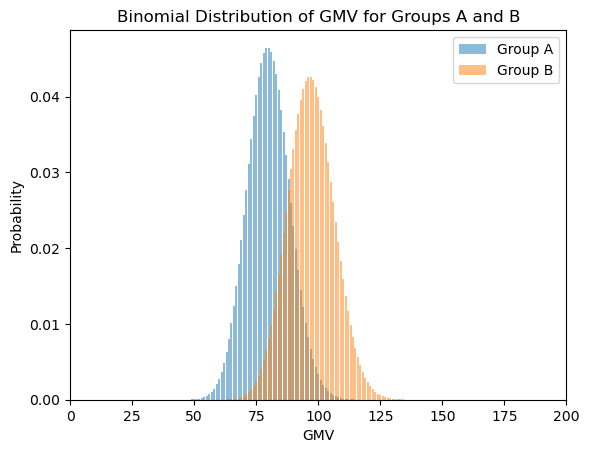

In [62]:
#plot the binomial distribution of the two variants
# Set parameters for the binomial distribution
n_A = len(df[df['Variant'] == 'A'])
n_B = len(df[df['Variant'] == 'B'])
p_A = gmv_mean_A
p_B = gmv_mean_B

# Generate x-values
x_values_A = np.arange(0, n_A + 1)
x_values_B = np.arange(0, n_B + 1)

# Calculate PMF for each group
pmf_A = binom.pmf(x_values_A, n_A, p_A)
pmf_B = binom.pmf(x_values_B, n_B, p_B)

# Plot
plt.bar(x_values_A, pmf_A, label='Group A', alpha=0.5)
plt.bar(x_values_B, pmf_B, label='Group B', alpha=0.5)

plt.xlabel('GMV')
plt.ylabel('Probability')
plt.title('Binomial Distribution of GMV for Groups A and B')
plt.xlim(0,200)
plt.legend()
plt.show()

In [66]:
#Perform t-test to calculate test statistic and a p-value 
t_statistic, p_value = stats.ttest_ind(df[df['Variant'] == 'A']['Purchase'],
                                       df[df['Variant'] == 'B']['Purchase'])

print("t-statistic:", round(t_statistic,2))
print("p-value:", round(p_value,2))

t-statistic: -1.34
p-value: 0.18


The p-value of 0.18 is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis, indicating that there is no statistically significant difference in the "Purchase" metric 